In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler

In [3]:
import pandas as pd

In [4]:
customers = pd.read_csv("C:/Users/Naga/OneDrive/Desktop/intern/Customers.csv")
products = pd.read_csv("C:/Users/Naga/OneDrive/Desktop/intern/Products.csv")
transactions = pd.read_csv("C:/Users/Naga/OneDrive/Desktop/intern/Transactions.csv")

In [5]:
customer_transactions = transactions.groupby("CustomerID")[["Quantity", "TotalValue"]].sum().reset_index()
customer_data = customers.merge(customer_transactions, on="CustomerID", how="left").fillna(0)

In [7]:
X = customer_data[[ 'Quantity', 'TotalValue']]

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
k = 4  
kmeans = KMeans(n_clusters=k, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(X_scaled)

In [10]:
db_index = davies_bouldin_score(X_scaled, customer_data['Cluster'])
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 0.7102764046737506


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

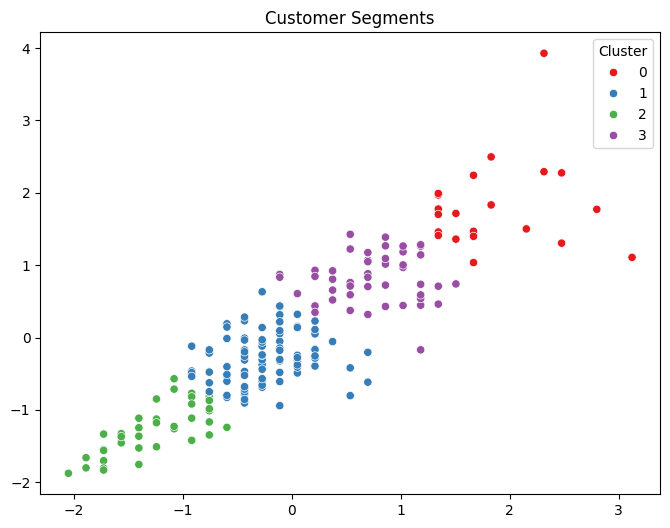

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=customer_data['Cluster'], palette="Set1")
plt.title("Customer Segments")
plt.savefig("customer_segments.png")
plt.show()